<a href="https://colab.research.google.com/github/aeslha/july_21/blob/main/DSRP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RQ: How Did Rising U.S Public and Private Debt After 2000
Presidential Election Correlate With Changes in Nominal GDP Growth Betweem 2001 And
2023?**

In [2]:
import warnings
warnings.filterwarnings('ignore')

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aeslha/july_21/refs/heads/main/GlobalDebtDatabase.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,"Total private debt, \nall instruments\n(percen...","Total private debt, \nloans and debt securitie...","Household debt, all instruments\n(percent of GDP)","Household debt, loans and debt securities\n(pe...","Non-financial corporations debt, all instrumen...","Non-financial corporations debt, loans and deb...",Public sector debt\n(percent of GDP),Nonfinancial public sector debt\n(percent of GDP),General government debt\n(percent of GDP),Central government debt\n(percent of GDP),Nominal gross domestic product\n(billions),NaN
2,NaN,1950,75.83,55.31,25.48,24.80,50.34,30.51,NaN,NaN,83.13,78.20,301.78,NaN
3,NaN,1951,72.69,53.66,24.52,23.91,48.17,29.75,NaN,NaN,72.96,68.20,348.99,NaN
4,NaN,1952,88.24,56.56,26.60,25.98,61.64,30.58,NaN,NaN,72.53,66.34,368.03,NaN


In [4]:
# dropping columns will only null values
df.drop(['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 13'], axis=1, inplace=True)
# dropping the first row of only null values
df.drop(0, axis=0, inplace = True)
# Renaming columns
df = df.rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Total Private Debt Of All Instruments', 'Unnamed: 3': 'Total Private Debt Of Loans And Securities', 'Unnamed: 4': 'Household Debt Of All Intruments', 'Unnamed: 5': 'Household Debt, Loans and Debt Securities', 'Unnamed: 6': 'Non-Financial Corporations Debt Of All Instruments', 'Unnamed: 7': 'Non Financial Corperations Debt, loans and Debt Securities', 'Unnamed: 10': 'General Government Debt', 'Unnamed: 11': 'Central Government Debt', 'Unnamed: 12': 'Nominal GDP' })
df.drop(1, axis=0, inplace = True)
df.head()

,Year,Total Private Debt Of All Instruments,Total Private Debt Of Loans And Securities,Household Debt Of All Intruments,"Household Debt, Loans and Debt Securities",Non-Financial Corporations Debt Of All Instruments,"Non Financial Corperations Debt, loans and Debt Securities",General Government Debt,Central Government Debt,Nominal GDP
2,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
3,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
4,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
5,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
6,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28


In [5]:
# changing dtypes to numeric
df = df.astype({'Year': 'int'})
float_cols = df.select_dtypes(include=['object']).columns
df[float_cols] = df[float_cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 2 to 75
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        74 non-null     int64  
 1   Total Private Debt Of All Instruments                       74 non-null     float64
 2   Total Private Debt Of Loans And Securities                  74 non-null     float64
 3   Household Debt Of All Intruments                            74 non-null     float64
 4   Household Debt, Loans and Debt Securities                   74 non-null     float64
 5   Non-Financial Corporations Debt Of All Instruments          74 non-null     float64
 6   Non Financial Corperations Debt, loans and Debt Securities  74 non-null     float64
 7   General Government Debt                                     74 non-null     float64
 8   Ce

In [6]:
# dropping first 50 rows (years) to only see data from and post the year 2000.
df=df.drop(df.index[0:50])

In [7]:
df.head(24)

,Year,Total Private Debt Of All Instruments,Total Private Debt Of Loans And Securities,Household Debt Of All Intruments,"Household Debt, Loans and Debt Securities",Non-Financial Corporations Debt Of All Instruments,"Non Financial Corperations Debt, loans and Debt Securities",General Government Debt,Central Government Debt,Nominal GDP
52,2000,196.44,136.74,72.48,70.85,123.96,65.90,54.64,41.38,10250.95
53,2001,203.22,141.41,76.28,74.71,126.94,66.70,54.53,40.66,10581.93
54,2002,209.16,145.62,81.14,79.45,128.02,66.17,56.94,42.12,10929.10
55,2003,206.66,149.35,86.99,85.27,119.67,64.08,59.82,44.68,11456.45
56,2004,210.47,153.24,90.98,89.22,119.49,64.02,67.29,45.48,12217.18
57,2005,216.52,157.57,94.51,92.73,122.02,64.84,67.13,45.61,13039.20
58,2006,222.89,164.09,98.71,96.92,124.18,67.17,65.91,44.83,13815.60
59,2007,230.98,170.86,100.59,98.74,130.38,72.12,66.25,45.17,14474.25
60,2008,235.93,170.76,98.15,96.15,137.79,74.61,74.97,53.41,14769.85
61,2009,235.52,169.54,99.24,96.96,136.29,72.59,87.80,64.97,14478.05


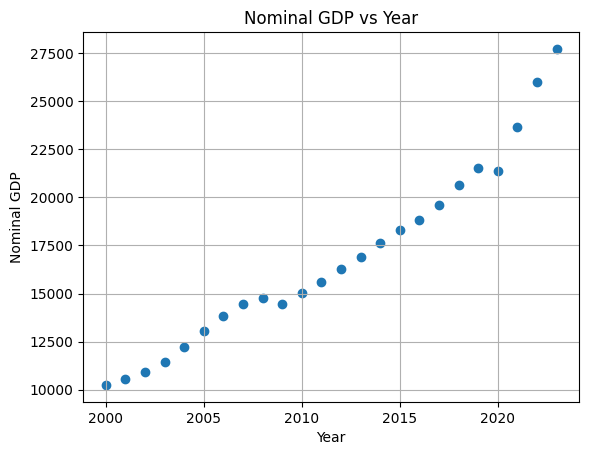

In [8]:
# seeing how nominal gdp has changed over the years
plt.scatter(df['Year'], df['Nominal GDP'])
plt.xlabel('Year')
plt.ylabel('Nominal GDP')
plt.title('Nominal GDP vs Year')
plt.grid(True)
plt.show()

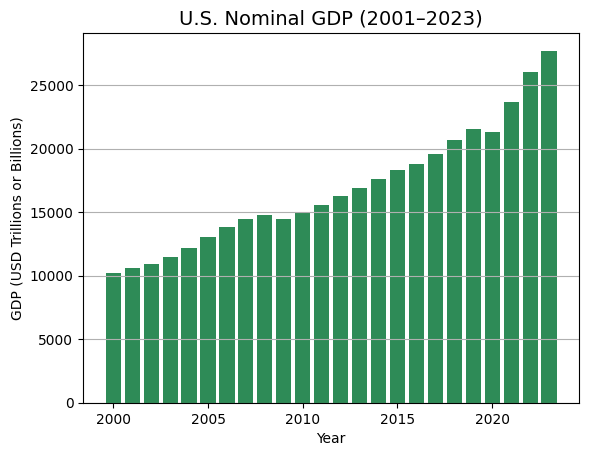

In [9]:
plt.bar(df['Year'], df['Nominal GDP'], color='seagreen')
plt.title('U.S. Nominal GDP (2001–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('GDP (USD Trillions or Billions)')
plt.grid(axis='y')
plt.show()

This graph explains that Nominal GDP has a consistently inreased over time with a few years of a drop in GDP. You can see that during the 2008 financial crisis GDP dropped as well during the Cvoid-19 pandemic.

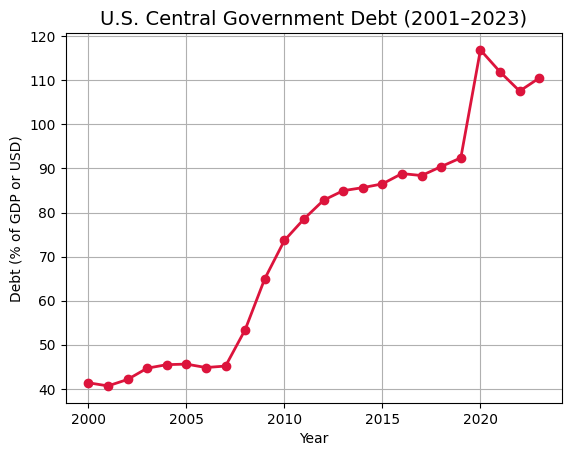

In [10]:
plt.plot(df['Year'], df['Central Government Debt'], color='crimson', linewidth=2, marker='o')
plt.title('U.S. Central Government Debt (2001–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Debt (% of GDP or USD)')
plt.grid(True)
plt.show()

This graoh explains how public debt or federal gvernmetn debt does not have on e specific trend over time. Instead during specific time periods the debt either increased greatly or decreasied greatly. Additionally, the average debt growth has also changed during different presidential terms.               

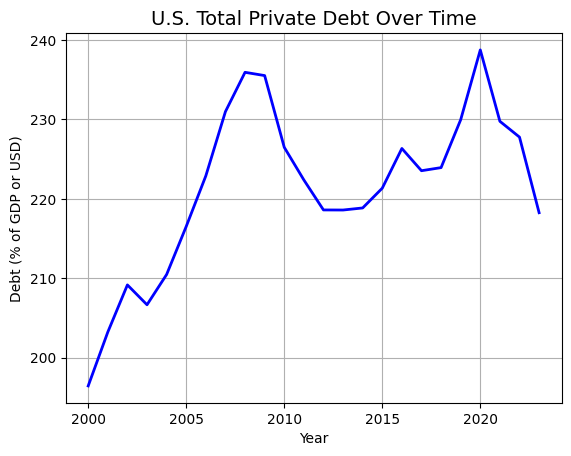

In [11]:
plt.plot(df['Year'], df['Total Private Debt Of All Instruments'], color='blue', linewidth=2)
plt.title('U.S. Total Private Debt Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Debt (% of GDP or USD)')
plt.grid(True)
plt.show()

 This graph shows how private debt in the U.S has changed since the year 2000. As you can see theres no constant trend and the percent of debt increases and decreases at different time periods. A specific moment you can see is that during 2008 financial crisi and 2020 pandemic crisis had the highest amount of debt. On the other during the recovey periods you can see the percent of debt decreased rapidly.